In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import json

# rcParams
mpl.rcParams['axes.titlesize'] = 16.
mpl.rcParams['axes.titleweight'] = 'bold'

In [16]:
json_data = json.load(open('samplesVsSensitivity.json', 'r'))

sample_fracs = json_data['sample_fracs']
sens_2jet = np.array(json_data['sens_2jet'])
sens_3jet = np.array(json_data['sens_3jet'])
err_2jet = np.array(json_data['err_2jet']) * 0.5
err_3jet = np.array(json_data['err_3jet']) * 0.5

sens_total = np.add(sens_2jet ** 2, sens_3jet ** 2) ** 0.5
err_total = np.add(err_2jet ** 2, err_3jet ** 2) ** 0.5

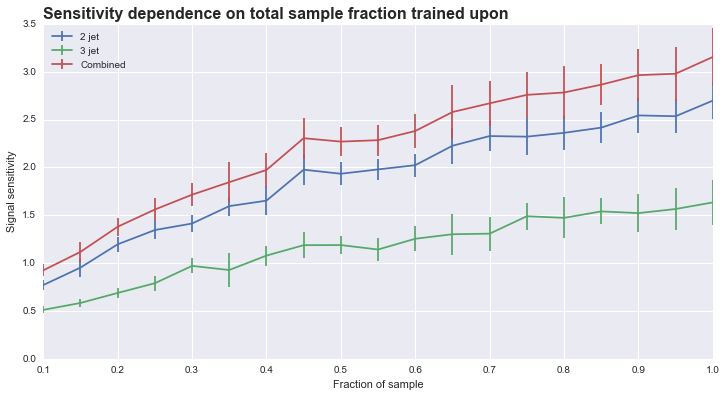

In [19]:
fig1, ax1 = plt.subplots(figsize=(12,6))

ax1.errorbar(sample_fracs, sens_2jet, yerr=err_2jet, marker="x", label='2 jet')
ax1.errorbar(sample_fracs, sens_3jet, yerr=err_3jet, marker="x", label='3 jet')
ax1.errorbar(sample_fracs, sens_total, yerr=err_total, marker="x", label='Combined')
plt.legend(loc='upper left');

# Titles
ax1.set_xlabel('Fraction of sample')
ax1.set_ylabel('Signal sensitivity')
ax1.set_title('Sensitivity dependence on total sample fraction trained upon', loc='left')

plt.savefig('sample_sensitivity_graph.png', transparent=True)
plt.show()

In [63]:
json_data_SB = json.load(open('samplesVsSensitivity_SB.json', 'r'))
json_data_SB.keys()

# These are the wrong way round.
sens_2jet_back_varied = json_data_SB['sens_2jet_signal_varied']
sens_3jet_back_varied = json_data_SB['sens_3jet_signal_varied']
err_2jet_back_varied = json_data_SB['err_2jet_signal_varied']
err_3jet_back_varied = json_data_SB['err_3jet_signal_varied']
sens_2jet_sig_varied = json_data_SB['sens_2jet_background_varied']
sens_3jet_sig_varied = json_data_SB['sens_3jet_background_varied']
err_2jet_sig_varied = json_data_SB['err_2jet_background_varied']
err_3jet_sig_varied = json_data_SB['err_3jet']

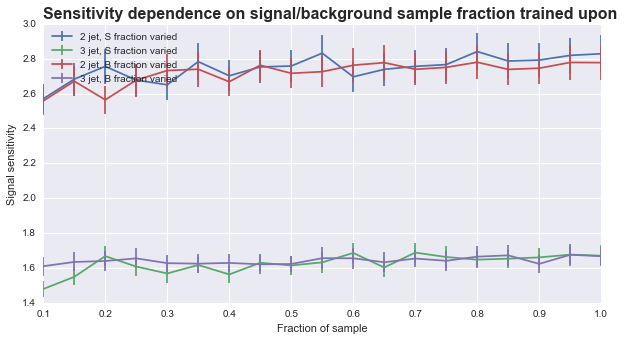

In [65]:
fig2, ax2 = plt.subplots(figsize=(10,5))

ax2.errorbar(sample_fracs, sens_2jet_sig_varied, yerr=err_2jet_sig_varied,
             marker="x", label='2 jet, S fraction varied')
ax2.errorbar(sample_fracs, sens_3jet_sig_varied, yerr=err_3jet_sig_varied,
             marker="x", label='3 jet, S fraction varied')
ax2.errorbar(sample_fracs, sens_2jet_back_varied, yerr=err_2jet_back_varied,
             marker="x", label='2 jet, B fraction varied')
ax2.errorbar(sample_fracs, sens_3jet_back_varied, yerr=err_3jet_back_varied,
             marker="x", label='3 jet, B fraction varied')
plt.legend(loc='upper left');

# Titles
ax2.set_xlabel('Fraction of sample')
ax2.set_ylabel('Signal sensitivity')
ax2.set_title('Sensitivity dependence on signal/background sample fraction trained upon', loc='left')

plt.show()

In [11]:
np.array([1,2,3])**2

array([1, 4, 9])